# Classifying Spotify musics with SVM

In [52]:
import sklearn
from sklearn import svm
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

Loading Iris

In [19]:
iris = datasets.load_iris()

Specifying train and classes

In [39]:
train   = iris.data
classes = iris.target

trainingdata = train[:-30]
trainingdata

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [21]:
trainingclasses = classes[:-30]

We're using 80% for training and 20% for testing

In [22]:
clf = svm.SVC().fit(trainingdata,trainingclasses)

In [23]:
testing_data    = train[-30:]
testing_data_predict = clf.predict(testing_data)

In [24]:
testing_data_predict

array([2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
classes[-30:]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

Plotting data

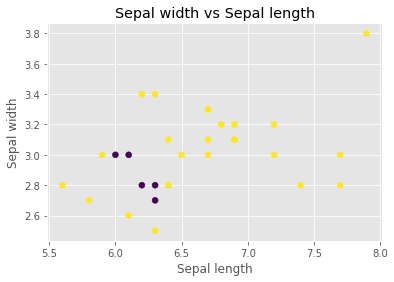

In [38]:
style.use('ggplot')
#sepal length vs sepal width
plt.plot()
plt.title('Sepal width vs Sepal length')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(train[-30:,0],train[-30:,1], c=testing_data_predict)

It only missed 5 point out of 30

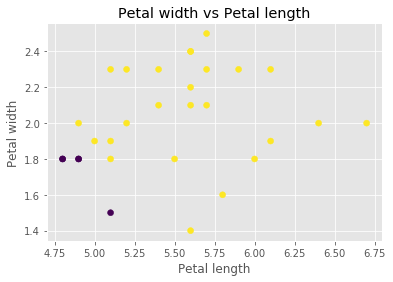

In [40]:
style.use('ggplot')
#petal length vs width
plt.plot()
plt.title('Petal width vs Petal length')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.scatter(train[-30:,2], train[-30:,3], c=testing_data_predict)

Using cross validation 

In [56]:
def accuracy(clf, x, y, folds):
    results = cross_val_predict(clf, x, y, cv=folds)
    return accuracy_score(y, results)

In [57]:
accuracy(clf,train,classes,5)

0.98

We got 98% of accuracy for this specific dataset, let's try a bigger one

### Now, we're going to use a Spotify dataset, trying to predict whether someone will like a music or not.